##Install Libraries

In [ ]:
!pip install ISLP
!pip install l0bnb

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import Stepwise, sklearn_selected, sklearn_selection_path
from l0bnb import fit_path
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR
from ISLP.bart import BART
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


##Import and Transform Data

In [ ]:
file_name = 'SCFP2022.xlsx'
file_name2 = 'SCFP2019.xlsx'
file_name3 = 'SCFP2016.xlsx'
df = pd.read_excel(file_name)
df2 = pd.read_excel(file_name2)
df3 = pd.read_excel(file_name3)

In [ ]:
df = df.drop(columns=['Y1', 'YY1','WILSH','WGT'])

In [ ]:
d2 = df2.drop(columns=['WILSH','WGT'])

In [ ]:
d3 = df3.drop(columns=['WILSH','WGT'])

In [ ]:
master_df1 = df
master_df2 = df2
master_df3 = df3
master_df = pd.concat([master_df1, master_df2, master_df3], ignore_index=True)

In [ ]:
def calculate_risk_aversion(row):
    if row['YESFINRISK'] == 0 and row['NOFINRISK'] == 1:
        return 'HIGH'
    elif row['YESFINRISK'] == 1 and row['NOFINRISK'] == 0:
        return 'LOW'
    elif row['YESFINRISK'] == 0 and row['NOFINRISK'] == 0:
        return 'MID'
    else:
        return None  # Optional: Handle unexpected cases

# Apply the function to create the RISKAVERSION column
master_df['RISKAVERSION'] = master_df.apply(calculate_risk_aversion, axis=1)
master_df.head()

<ipython-input-50-50c12ee11fdf>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df['RISKAVERSION'] = master_df.apply(calculate_risk_aversion, axis=1)


HHSEX  AGE  AGECL  EDUC  EDCL  MARRIED  KIDS  LF  LIFECL  FAMSTRUCT  ...  \
0      2   70      5     9     3        2     2   0       6          1  ...   
1      2   70      5     9     3        2     2   0       6          1  ...   
2      2   70      5     9     3        2     2   0       6          1  ...   
3      2   70      5     9     3        2     2   0       6          1  ...   
4      2   70      5     9     3        2     2   0       6          1  ...   

   NINCCAT  NINC2CAT  NWPCTLECAT  INCPCTLECAT  NINCPCTLECAT  INCQRTCAT  \
0        2         1           8            3             3          2   
1        2         1           8            3             3          2   
2        2         1           8            3             3          1   
3        1         1           6            3             2          1   
4        2         1           8            3             3          1   

   NINCQRTCAT  WGT  WILSH  RISKAVERSION  
0           1  NaN    NaN           MID  
1           1  NaN    NaN           MID  
2           1  NaN    NaN           MID  
3           1  NaN    NaN           MID  
4           1  NaN    NaN           MID  

[5 rows x 356 columns]

##Aggregate Exploratory Analysis to validate well-known Theory (Income, net worth, and age)

In [ ]:
y = master_df['RISKAVERSION']
X = master_df.drop(columns=['RISKAVERSION','NOFINRISK','YESFINRISK'])

In [ ]:
dff = pd.concat([df, df2, df3], ignore_index=True)

def calculate_risk_aversion_2(row):
    if row['YESFINRISK'] == 0 and row['NOFINRISK'] == 1:
        return 1
    elif row['YESFINRISK'] == 1 and row['NOFINRISK'] == 0:
        return 0
    elif row['YESFINRISK'] == 0 and row['NOFINRISK'] == 0:
        return 0.5
    else:
        return None  # Optional: Handle unexpected cases

# Apply the function to create the RISKAVERSION column
dff['RISKAVERSION'] = dff.apply(calculate_risk_aversion_2, axis=1)

# Calculate average RISKAVERSION for each value of NWPCTLECAT and INCPCTLECAT
avg_nw = dff.groupby('NWPCTLECAT')['RISKAVERSION'].mean()
avg_inc = dff.groupby('INCPCTLECAT')['RISKAVERSION'].mean()

<ipython-input-54-839da3107765>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dff['RISKAVERSION'] = dff.apply(calculate_risk_aversion_2, axis=1)


In [ ]:
dff = pd.concat([df, df2, df3], ignore_index=True)

def calculate_risk_aversion_2(row):
    if row['YESFINRISK'] == 0 and row['NOFINRISK'] == 1:
        return 1
    elif row['YESFINRISK'] == 1 and row['NOFINRISK'] == 0:
        return 0
    elif row['YESFINRISK'] == 0 and row['NOFINRISK'] == 0:
        return 0.5
    else:
        return None  # Optional: Handle unexpected cases

# Apply the function to create the RISKAVERSION column
dff['RISKAVERSION'] = dff.apply(calculate_risk_aversion_2, axis=1)



import matplotlib.pyplot as plt

# Calculate average RISKAVERSION for each value of NWPCTLECAT and INCPCTLECAT
avg_age = dff.groupby('AGE')['RISKAVERSION'].mean()


<ipython-input-12-713fa8944bb1>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dff['RISKAVERSION'] = dff.apply(calculate_risk_aversion_2, axis=1)


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Group data and compute averages
nw_avg = dff.groupby('NWPCTLECAT')['RISKAVERSION'].mean().reset_index()
inc_avg = dff.groupby('INCPCTLECAT')['RISKAVERSION'].mean().reset_index()

# Prepare data for modeling (NWPCTLECAT)
X_nw = nw_avg['NWPCTLECAT']  # Independent variable
y_nw = nw_avg['RISKAVERSION']  # Dependent variable

# Prepare data for modeling (INCPCTLECAT)
X_inc = inc_avg['INCPCTLECAT']  # Independent variable
y_inc = inc_avg['RISKAVERSION']  # Dependent variable

# Add constant for OLS regression
X_nw_ols = sm.add_constant(X_nw)
X_inc_ols = sm.add_constant(X_inc)

# Fit OLS models
nw_model = sm.OLS(y_nw, X_nw_ols).fit()
inc_model = sm.OLS(y_inc, X_inc_ols).fit()

# Predict values
nw_pred = nw_model.predict(X_nw_ols)
inc_pred = inc_model.predict(X_inc_ols)

# Diagnostic metrics
def print_model_summary(model, label):
    print(f"\n{label} Model Summary:")
    print(model.summary())

print_model_summary(nw_model, "NWPCTLECAT")
print_model_summary(inc_model, "INCPCTLECAT")


NWPCTLECAT Model Summary:
                            OLS Regression Results                            
Dep. Variable:           RISKAVERSION   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     64.51
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.14e-05
Time:                        23:16:12   Log-Likelihood:                 23.156
No. Observations:                  12   AIC:                            -42.31
Df Residuals:                      10   BIC:                            -41.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8118    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Group data and compute averages
age_avg = dff.groupby('AGE')['RISKAVERSION'].mean().reset_index()

# Prepare data for modeling (NWPCTLECAT)
X_age = age_avg['AGE']  # Independent variable
y_age = age_avg['RISKAVERSION']  # Dependent variable

# Add constant for OLS regression
X_age_ols = sm.add_constant(X_age)

# Fit OLS models
age_model = sm.OLS(y_age, X_age_ols).fit()

# Predict values
age_pred = age_model.predict(X_age_ols)


# Diagnostic metrics
def print_model_summary(model, label):
    print(f"\n{label} Model Summary:")
    print(model.summary())

print_model_summary(age_model, "AGE")


AGE Model Summary:
                            OLS Regression Results                            
Dep. Variable:           RISKAVERSION   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     86.84
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           3.28e-14
Time:                        23:42:06   Log-Likelihood:                 131.83
No. Observations:                  78   AIC:                            -259.7
Df Residuals:                      76   BIC:                            -254.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5410      0.014

In [ ]:
# prompt: output all rows from age_pred as csv. y_age doesn't have the AGE column

import pandas as pd

# Assuming 'age_pred' is already calculated as in your provided code.
# Create a DataFrame from the predictions and the corresponding AGE values.
age_pred_df = pd.DataFrame({'AGE': X_age, 'Predicted_Risk_Aversion': age_pred})

# Export to CSV
age_pred_df.to_csv('age_pred.csv', index=False)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np


# Assume `df` is your DataFrame
# Replace this with loading your actual dataset
# df = pd.read_csv('your_dataset.csv')

# Independent variables
XX = dff[['NWPCTLECAT', 'INCPCTLECAT', 'AGE']]

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume `df` is your DataFrame
# Replace this with loading your actual dataset
# df = pd.read_csv('your_dataset.csv')

# Create interaction terms manually
dff['NetWorth_Income_Interaction'] = dff['NWPCTLECAT'] * dff['INCPCTLECAT']
dff['NetWorth_Age_Interaction'] = dff['NWPCTLECAT'] * dff['AGE']
dff['Income_Age_Interaction'] = dff['INCPCTLECAT'] * dff['AGE']

# Independent variables with interaction terms
XX = dff[['NWPCTLECAT', 'INCPCTLECAT', 'AGE',
        'NetWorth_Income_Interaction', 'NetWorth_Age_Interaction', 'Income_Age_Interaction']]

# Add a constant for the intercept
XX = sm.add_constant(XX)

# Dependent variable
yy = dff['RISKAVERSION']

# OLS regression
model = sm.OLS(yy, XX).fit()

# Regression summary
print(model.summary())

# Variance Inflation Factor (VIF) for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = XX.columns
vif_data["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:           RISKAVERSION   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3766.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:22:19   Log-Likelihood:                -523.74
No. Observations:               83100   AIC:                             1061.
Df Residuals:                   83093   BIC:                             1127.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

dff = dff.drop(columns=['WILSH','WGT'])

y = dff['RISKAVERSION']
X = dff.drop(columns=['RISKAVERSION','NOFINRISK','YESFINRISK'])
# Step 1: Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Use only the first 10 components
n_components = 10
X_pca_reduced = X_pca[:, :n_components]

# Plot the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=40)

# Step 3: Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Recover original variable contributions
loadings = pca.components_[:n_components]  # Loadings for selected components
variable_importance = pd.DataFrame(loadings.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Add explained variance as a separate DataFrame for the selected components
explained_variance_df = pd.DataFrame(
    explained_variance[:n_components],
    index=[f'PC{i+1}' for i in range(n_components)],
    columns=['Explained Variance']
)

# Display variable importance and explained variance
print("\nVariable Importance (Loadings for each Principal Component):")
print(variable_importance)

print("\nExplained Variance for each Principal Component:")
print(explained_variance_df)

# Save results to CSV if needed
variable_importance.to_csv("variable_importance_pca.csv", index=True)
explained_variance_df.to_csv("explained_variance_pca.csv", index=True)

Mean Squared Error: 0.057373634748730466
R-squared: 0.24588250581899074

Variable Importance (Loadings for each Principal Component):
                   PC1       PC2       PC3       PC4       PC5       PC6  \
HHSEX        -0.071972  0.055615 -0.008629  0.016327  0.000774 -0.019016   
AGE           0.059176  0.008342 -0.126071  0.186544  0.018093 -0.160938   
AGECL         0.058403  0.009872 -0.126382  0.186220  0.017362 -0.160267   
EDUC          0.101333 -0.075868  0.007000 -0.026426  0.026384  0.068541   
EDCL          0.097767 -0.073911  0.008484 -0.027551  0.025610  0.069778   
...                ...       ...       ...       ...       ...       ...   
NWPCTLECAT    0.160277 -0.076914 -0.065370  0.084460 -0.015909  0.004853   
INCPCTLECAT   0.159866 -0.097123 -0.007816 -0.019720  0.003512  0.076887   
NINCPCTLECAT  0.161158 -0.096363 -0.004783 -0.021548 -0.000848  0.079053   
INCQRTCAT     0.145639 -0.114039  0.007626 -0.027343  0.016489  0.056504   
NINCQRTCAT    0.146350 -0.1130

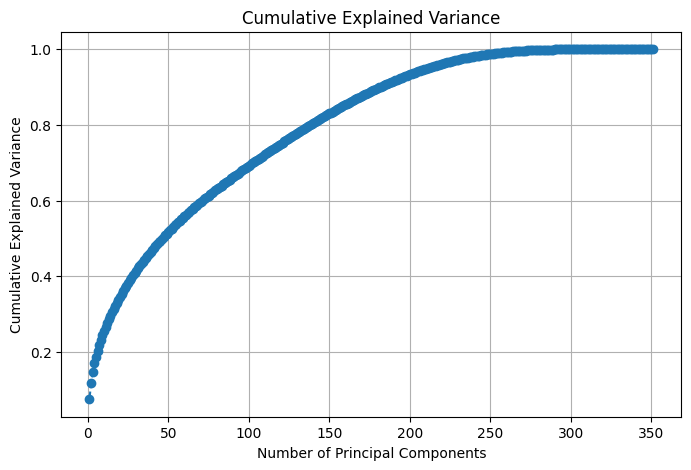

Accuracy: 0.7396209386281588

Confusion Matrix:
[[ 6514     3  4315]
 [  389    36  1276]
 [ 2545   127 18035]]

Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.60      0.64     10832
         Low       0.22      0.02      0.04      1701
      Medium       0.76      0.87      0.81     20707

    accuracy                           0.74     33240
   macro avg       0.56      0.50      0.50     33240
weighted avg       0.71      0.74      0.72     33240


Log Loss: 0.6347

Variable Importance (Loadings for each Principal Component):
                   PC1       PC2       PC3       PC4       PC5       PC6  \
HHSEX        -0.071972  0.055615 -0.008629  0.016327  0.000774 -0.019016   
AGE           0.059176  0.008342 -0.126071  0.186544  0.018093 -0.160938   
AGECL         0.058403  0.009872 -0.126382  0.186220  0.017362 -0.160267   
EDUC          0.101333 -0.075868  0.007000 -0.026426  0.026384  0.068541   
EDCL          0.097767 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt

y = pd.cut(dff['RISKAVERSION'], bins=3, labels=['Low', 'Medium', 'High'])

# Prepare the independent variables
X = dff.drop(columns=['RISKAVERSION', 'NOFINRISK', 'YESFINRISK'])

# Step 1: Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Use only the first 10 components
n_components = 10
X_pca_reduced = X_pca[:, :n_components]

# Plot the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.4, random_state=40)

# Step 3: Train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test set
y_pred = lda.predict(X_test)
y_pred_proba = lda.predict_proba(X_test)  # Predicted probabilities for log loss calculation

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f"\nLog Loss: {log_loss_value:.4f}")

# Step 5: Recover contributions of original variables
loadings = pca.components_[:n_components]  # Loadings for selected components
variable_importance = pd.DataFrame(loadings.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Add explained variance as a separate DataFrame for the selected components
explained_variance_df = pd.DataFrame(
    explained_variance[:n_components],
    index=[f'PC{i+1}' for i in range(n_components)],
    columns=['Explained Variance']
)

# Display variable importance and explained variance
print("\nVariable Importance (Loadings for each Principal Component):")
print(variable_importance)

print("\nExplained Variance for each Principal Component:")
print(explained_variance_df)

# Save results to CSV if needed
variable_importance.to_csv("variable_importance_pca.csv", index=True)
explained_variance_df.to_csv("explained_variance_pca.csv", index=True)


## ADA Boost (Param Tunning)

In [ ]:
y = master_df['RISKAVERSION']
X = master_df.drop(columns=['RISKAVERSION','NOFINRISK','YESFINRISK'])

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

n_estimators_range = [10, 15, 20, 50, 100, 150]
max_depth_range = [2, 3, 4, 5, 6, 7, 8, 9]

# Initialize lists to store results
results = []

# Loop over parameter combinations
for max_depth in max_depth_range:
    for n_estimators in n_estimators_range:
        # Initialize the base estimator with Gini impurity
        base_estimator = DecisionTreeClassifier(
            criterion='gini', max_depth=max_depth, random_state=42
        )

        # Initialize the AdaBoost classifier
        ada_classifier = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=n_estimators,
            random_state=42
        )

        # Train the model
        ada_classifier.fit(X_train, y_train)

        # Predict on test data
        y_pred = ada_classifier.predict(X_test)
        y_pred_proba = ada_classifier.predict_proba(X_test)

        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Compute log loss (cross-entropy loss)
        logloss = log_loss(y_test, y_pred_proba)

        # Store the results
        results.append({
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'accuracy': accuracy,
            'log_loss': logloss
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
accuracy_pivot = results_df.pivot(index='max_depth', columns='n_estimators', values='accuracy')
logloss_pivot = results_df.pivot(index='max_depth', columns='n_estimators', values='log_loss')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

## ADA Boost (Run)

In [ ]:
from sklearn.metrics import classification_report
RS = 40
#y = master_df['INCPCTLECAT']
#X = master_df.drop(columns=['INCPCTLECAT','NOFINRISK','YESFINRISK','INCCAT','INCOME','INCQRTCAT','NORMINC','NINCPCTLECAT'])

y = master_df['RISKAVERSION']
#X = master_df.drop(columns=['RISKAVERSION','NOFINRISK','YESFINRISK'])
X = master_df.drop(columns=['RISKAVERSION','NOFINRISK','YESFINRISK'])

# Set random seed for reproducibility
np.random.seed(0)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=RS)

# -------------------------------
# Model Training
# -------------------------------
# Initialize the base estimator with Gini impurity
base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=RS) #max_leaf_nodes=9 #max_leaf_nodes=12,

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=20,
    random_state=RS
)

# Train the model
ada_classifier.fit(X_train, y_train)

# -------------------------------
# Model Evaluation
# -------------------------------
# Predict on test data
y_pred = ada_classifier.predict(X_test)
y_pred_proba = ada_classifier.predict_proba(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute log loss (cross-entropy loss)
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss (Cross-Entropy Loss): {logloss:.4f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

target_names=label_encoder.classes_

# -------------------------------
# Feature Importance Visualization
# -------------------------------
# Get feature importances
feature_importances = ada_classifier.feature_importances_

# Create a dataframe for feature importances
feat_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
feat_importances_df = feat_importances_df.sort_values('Importance', ascending=False)


# -------------------------------
# Plotting the Final Tree
# -------------------------------
# Since AdaBoost uses multiple estimators, we can visualize one of them
# Let's plot the final estimator (last tree)

# Get the final estimator
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# -------------------------------
# Plotting the Final Tree
# -------------------------------

# Get the final estimator (last tree in AdaBoost ensemble)
final_estimator = ada_classifier.estimators_[-1]


# -------------------------------
# Recovering Original Class Labels
# -------------------------------

# Inverse transform the predicted encoded labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display the recovered class labels
print("Predicted Original Class Labels:")
print(y_pred_original)

# Inverse transform the true test labels for comparison
y_test_original = label_encoder.inverse_transform(y_test)
print("\nTrue Original Class Labels:")
print(y_test_original)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8298
Log Loss (Cross-Entropy Loss): 0.5358

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.79      0.73      0.76     10832
         LOW       0.89      0.66      0.76      1701
         MID       0.84      0.89      0.87     20707

    accuracy                           0.83     33240
   macro avg       0.84      0.76      0.79     33240
weighted avg       0.83      0.83      0.83     33240

Predicted Original Class Labels:
['MID' 'MID' 'MID' ... 'MID' 'HIGH' 'MID']

True Original Class Labels:
['MID' 'MID' 'MID' ... 'MID' 'HIGH' 'MID']


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# -------------------------------
# Plotting the Final Tree
# -------------------------------

# Get the final estimator (last tree in AdaBoost ensemble)
final_estimator = ada_classifier.estimators_[-1]

# Plot the tree
plt.figure(figsize=(200,100))
plot_tree(
    final_estimator,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Final Decision Tree from AdaBoost Ensemble')
plt.show()

# -------------------------------
# Recovering Original Class Labels
# -------------------------------

# Inverse transform the predicted encoded labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display the recovered class labels
print("Predicted Original Class Labels:")
print(y_pred_original)

# Inverse transform the true test labels for comparison
y_test_original = label_encoder.inverse_transform(y_test)
print("\nTrue Original Class Labels:")
print(y_test_original)

ValueError: y contains previously unseen labels: ['High' 'Low' 'Medium']

## LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression(
    multi_class='multinomial',  # Use 'multinomial' for multi-class classification
    solver='lbfgs',              # Solver that supports multi-class
    max_iter=1000000,               # Increase iterations if necessary
    random_state=40
)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)

# Compute accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')

# Compute log loss
logloss_logistic = log_loss(y_test, y_pred_proba_logistic)
print(f'Logistic Regression Log Loss: {logloss_logistic:.4f}')

# Classification report
print('\nClassification Report (Logistic Regression):')
print(classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7392
Logistic Regression Log Loss: 0.6342

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

        HIGH       0.68      0.60      0.64      5419
         LOW       0.58      0.01      0.02       879
         MID       0.76      0.87      0.81     10322

    accuracy                           0.74     16620
   macro avg       0.67      0.50      0.49     16620
weighted avg       0.73      0.74      0.72     16620

